In [1]:
import numpy as np
import pylab as pl
import scipy as sc
import matplotlib
from datetime import datetime
%matplotlib notebook 

directory = 'Measurements/'
filenames = []

for k in range(12):
    filenames.append("Mess"+("0" if k+1<10 else "")+str(k+1)+"a.txt")
    filenames.append("Mess"+("0" if k+1<10 else "")+str(k+1)+"b.txt")
print(filenames)
data = {}
l_date = []
l_time = []
for dataset in range(len(filenames)):
    mat = []
    #print(filenames[dataset])
    gps_file = open(directory+filenames[dataset], "r")
    # mat = np.loadtxt(directory+filenames[dataset]) #change for loop
    for line in gps_file:
        date, time, long, lat, *alt = line.split()
        l_date.append(date)
        l_time.append(time)
        mat.append([float(long),float(lat),float(alt[0] if (len(alt) > 0)else 0)])
    mat = np.array(mat)
    data[filenames[dataset]] = mat
#print(data)

['Mess01a.txt', 'Mess01b.txt', 'Mess02a.txt', 'Mess02b.txt', 'Mess03a.txt', 'Mess03b.txt', 'Mess04a.txt', 'Mess04b.txt', 'Mess05a.txt', 'Mess05b.txt', 'Mess06a.txt', 'Mess06b.txt', 'Mess07a.txt', 'Mess07b.txt', 'Mess08a.txt', 'Mess08b.txt', 'Mess09a.txt', 'Mess09b.txt', 'Mess10a.txt', 'Mess10b.txt', 'Mess11a.txt', 'Mess11b.txt', 'Mess12a.txt', 'Mess12b.txt']


In [2]:
# Importing the great_circle module from the library 
from geopy.distance import great_circle 
# Importing the geodesic module from the library 
from geopy.distance import geodesic 

# Loading the lat-long data for Kolkata & Delhi 
Haus = (49.449693, 11.839245) 
Platz = (49.449699, 11.839300) 
  
# Print the distance calculated in km 
print(great_circle(Haus, Platz).m) 

# Print the distance calculated in m 
print(geodesic(Haus, Platz, ellipsoid='WGS-84' ).m)

4.03151787902846
4.0435365946767705


In [3]:
def calc_dist(Loc1,Lat2,Long2):
    Loc = (Lat2,Long2)
    return geodesic(Loc1, Loc, ellipsoid='WGS-84' ).m

In [4]:
b_4 = False
for n,d_set in enumerate(data):
    print(d_set)
    rng = range((int(len(data[d_set][:,0]) / 2) - 50), (int(len(data[d_set][:,0]) / 2) + 50))
    rng = range(len(data[d_set][:,0])-210, len(data[d_set][:,0])-30)
    print(len(rng))
    if (n % 4) == 0:
        b_4 = not b_4
    if b_4:
        print('Haus:', Haus, 'Mess:', (np.mean(data[d_set][rng,0]),np.mean(data[d_set][rng,1])))
        
        print(calc_dist(Haus,np.mean(data[d_set][rng,0]),np.mean(data[d_set][rng,1])), '\n')
    else:
        print('Platz', Platz, 'Mess:', (np.mean(data[d_set][rng,0]),np.mean(data[d_set][rng,1])))
        print(calc_dist(Platz,np.mean(data[d_set][rng,0]),np.mean(data[d_set][rng,1])), '\n')

Mess01a.txt
180
Haus: (49.449693, 11.839245) Mess: (49.44980538722221, 11.839363930000001)
15.185731996471118 

Mess01b.txt
180
Haus: (49.449693, 11.839245) Mess: (49.449633500000004, 11.839397)
12.85565811854641 

Mess02a.txt
180
Haus: (49.449693, 11.839245) Mess: (49.44976720166666, 11.83926780222222)
8.416593984219382 

Mess02b.txt
180
Haus: (49.449693, 11.839245) Mess: (49.4495659, 11.839510599999999)
23.889902705972464 

Mess03a.txt
180
Platz (49.449699, 11.8393) Mess: (49.44972278499999, 11.839233629444445)
5.4916931085186205 

Mess03b.txt
180
Platz (49.449699, 11.8393) Mess: (49.44975269999999, 11.839418999999996)
10.494080483858534 

Mess04a.txt
180
Platz (49.449699, 11.8393) Mess: (49.449716422222224, 11.839246988333333)
4.304679690365868 

Mess04b.txt
180
Platz (49.449699, 11.8393) Mess: (49.44985749999999, 11.839306300000004)
17.63404120867177 

Mess05a.txt
180
Haus: (49.449693, 11.839245) Mess: (49.44972958944446, 11.839249941111113)
4.0851627159667085 

Mess05b.txt
180
Hau

In [60]:
from ipyleaflet import Map, Marker, MarkerCluster, CircleMarker, basemaps, basemap_to_tiles, LegendControl
b_4 = False
b_1 = False
dist_Modela = []
dist_Modelb = []
mark_Hausa = []
mark_Hausb = []
mark_Platza = []
mark_Platzb = []
x_where = []
for n,d_set in enumerate(data):
    if (n % 4) == 0:
        b_4 = not b_4
    b_1 = not b_1
    if b_1:
        if b_4:
            x_where.append('Haus')
            dist_Modela.append(calc_dist(Haus,np.mean(data[d_set][:,0]),np.mean(data[d_set][:,1])))
            mark_Hausa.append(CircleMarker(location=(np.mean(data[d_set][:,0]),np.mean(data[d_set][:,1])),radius=1,color="blue",fillcolor="blue"))
        else:
            x_where.append('Platz')
            dist_Modela.append(calc_dist(Platz,np.mean(data[d_set][:,0]),np.mean(data[d_set][:,1])))
            mark_Platza.append(CircleMarker(location=(np.mean(data[d_set][:,0]),np.mean(data[d_set][:,1])),radius=1,color="blue",fillcolor="blue"))
    else:
        if b_4:
            dist_Modelb.append(calc_dist(Haus,np.mean(data[d_set][:,0]),np.mean(data[d_set][:,1])))
            mark_Hausb.append(CircleMarker(location=(np.mean(data[d_set][:,0]),np.mean(data[d_set][:,1])),radius=1,color="orange",fillcolor="orange"))
        else:
            dist_Modelb.append(calc_dist(Platz,np.mean(data[d_set][:,0]),np.mean(data[d_set][:,1])))
            mark_Platzb.append(CircleMarker(location=(np.mean(data[d_set][:,0]),np.mean(data[d_set][:,1])),radius=1,color="orange",fillcolor="orange"))

b_1 = False
for n in range(len(x_where)):
    b_1 = not b_1
    if b_1:
        x_where[n] = x_where[n] + '_oben'
    else:
        x_where[n] = x_where[n] + '_unten'
print(x_where)


['Haus_oben', 'Haus_unten', 'Platz_oben', 'Platz_unten', 'Haus_oben', 'Haus_unten', 'Platz_oben', 'Platz_unten', 'Haus_oben', 'Haus_unten', 'Platz_oben', 'Platz_unten']


<IPython.core.display.Javascript object>


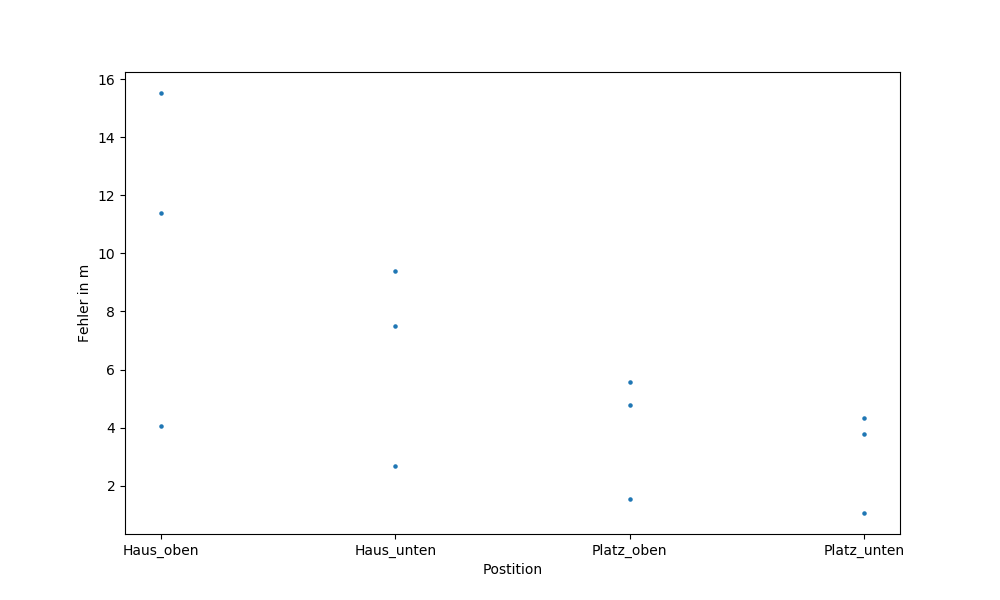

<IPython.core.display.Javascript object>


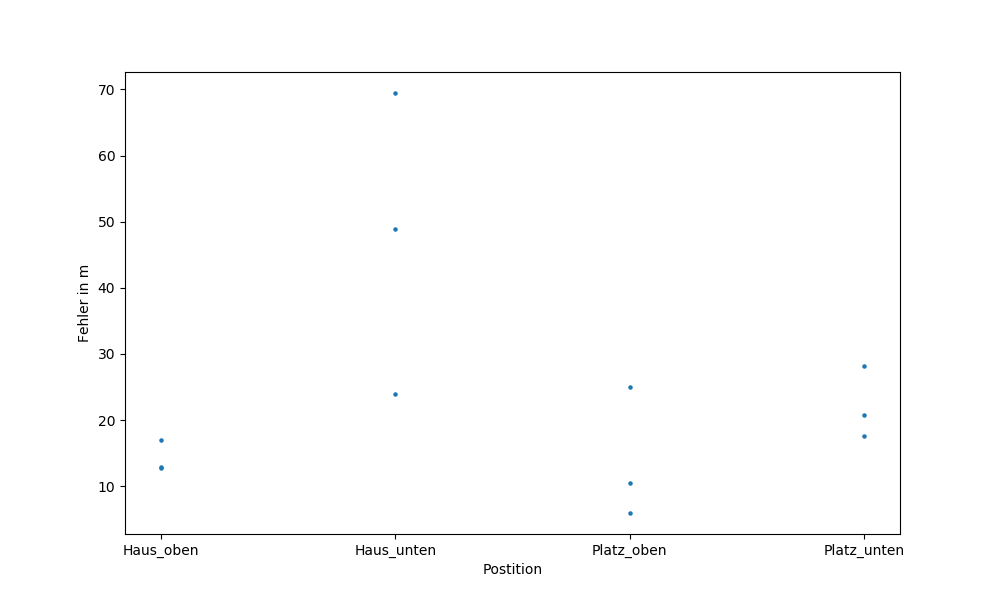

In [61]:
fig = pl.figure(figsize=(10,6))
pl.scatter(x_where, dist_Modela,s=5)
pl.xlabel('Postition')
pl.ylabel('Fehler in m')
pl.show()
fig = pl.figure(figsize=(10,6))
pl.scatter(x_where, dist_Modelb,s=5)
pl.xlabel('Postition')
pl.ylabel('Fehler in m')
pl.show()

In [62]:
m = Map(center=Haus,zoom=20, max_zoom=19)
mark_HausaOben = mark_Hausa[0::2]
mark_HausaBoden = mark_Hausa[1::2]
mark_HausbOben = mark_Hausb[0::2]
mark_HausbBoden = mark_Hausb[1::2]
for n in mark_HausaBoden:
    n.color="green"
    n.fillcolor="green"
for n in mark_HausbBoden:
    n.color="violet"
    n.fillcolor="violet"
mark_HausaOben.append(CircleMarker(location=Haus,radius=1,color="red",fillcolor="red"))
mark_HausaBoden.append(CircleMarker(location=Haus,radius=1,color="red",fillcolor="red"))
mark_HausbOben.append(CircleMarker(location=Haus,radius=1,color="red",fillcolor="red"))
mark_HausbBoden.append(CircleMarker(location=Haus,radius=1,color="red",fillcolor="red"))
for n in mark_HausaOben:
    m.add_layer(n)
for n in mark_HausaBoden:
    m.add_layer(n)
for n in mark_HausbOben:
    m.add_layer(n)
for n in mark_HausbBoden:
    m.add_layer(n)
#marker_cluster = MarkerCluster(markers=tuple(mark_HausaOben))
#m.add_layer(marker_cluster)
legend = LegendControl({"real":"red", "gemessen; Modell A; 1,5m AGL":"blue", 
                        "gemessen; Modell A; 0,0m AGL":"green",
                        "gemessen; Modell B; 1,5m AGL":"orange",
                        "gemessen; Modell B; 0,0m AGL":"violet",}, name="Legend", position="bottomright")
legend.name = "GPS-Position Haus"
m.add_control(legend)
m.save("mapHaus.html")
m

Map(center=[49.449693, 11.839245], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [63]:
m = Map(center=Platz,zoom=20, max_zoom=19)
mark_PlatzaOben = mark_Platza[0::2]
mark_PlatzaBoden = mark_Platza[1::2]
mark_PlatzbOben = mark_Platzb[0::2]
mark_PlatzbBoden = mark_Platzb[1::2]
for n in mark_PlatzaBoden:
    n.color="green"
    n.fillcolor="green"
for n in mark_PlatzbBoden:
    n.color="violet"
    n.fillcolor="violet"
mark_PlatzaOben.append(CircleMarker(location=Platz,radius=1,color="red",fillcolor="red"))
mark_PlatzaBoden.append(CircleMarker(location=Platz,radius=1,color="red",fillcolor="red"))
mark_PlatzbOben.append(CircleMarker(location=Platz,radius=1,color="red",fillcolor="red"))
mark_PlatzbBoden.append(CircleMarker(location=Platz,radius=1,color="red",fillcolor="red"))
for n in mark_PlatzaOben:
    m.add_layer(n)
for n in mark_PlatzaBoden:
    m.add_layer(n)
for n in mark_PlatzbOben:
    m.add_layer(n)
for n in mark_PlatzbBoden:
    m.add_layer(n)
#marker_cluster = MarkerCluster(markers=tuple(mark_PlatzaOben))
#m.add_layer(marker_cluster)
legend = LegendControl({"real":"red", "gemessen; Modell A; 1,5m AGL":"blue", 
                        "gemessen; Modell A; 0,0m AGL":"green",
                        "gemessen; Modell B; 1,5m AGL":"orange",
                        "gemessen; Modell B; 0,0m AGL":"violet",}, name="Legend", position="bottomright")
legend.name = "GPS-Position Platz"
m.add_control(legend)
m.save("mapPlatz.html")
m

Map(center=[49.449699, 11.8393], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [3]:
timestamps = []
l_frequency = []
for k,dates in enumerate(l_date):
    timestamps.append(datetime.strptime(l_date[k]+' '+l_time[k], '%d.%m.%y %H:%M:%S:%f'))
    if len(timestamps) > 1:
        delta = timestamps[k]-timestamps[k-1]
        l_frequency.append(1/abs(float(delta.total_seconds())) if float(delta.total_seconds()) != 0 else 0)
    if len(timestamps) == 2:
        l_frequency.append(1/abs(float(delta.total_seconds())) if float(delta.total_seconds()) != 0 else 0)

print('Frequency Mean Value: ',np.mean(l_frequency))

Frequency Mean Value:  2.318447912217643


In [5]:
import pyproj
def gps_to_ecef_pyproj(lat, lon, alt):
    ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    x, y, z = pyproj.transform(lla, ecef, lon, lat, alt, radians=False)

    return x, y, z

print(gps_to_ecef_pyproj(mat[:,0],mat[:,1], mat[:,2]))

(array([4066181.96572377, 4066179.19706891, 4066178.41352145, ...,
       4066472.27035127, 4066472.2870722 , 4066472.28861582]), array([852374.76071407, 852375.15827909, 852375.31260053, ...,
       852429.68114403, 852429.76615039, 852430.12952504]), array([4823221.84914905, 4823224.09782808, 4823224.72687952, ...,
       4823571.34318346, 4823571.31425947, 4823571.24918049]))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  """
